## Dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

## Load Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

## 결측치확인

 - 결측치 없음

In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Data 확인

**season별 대여량**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


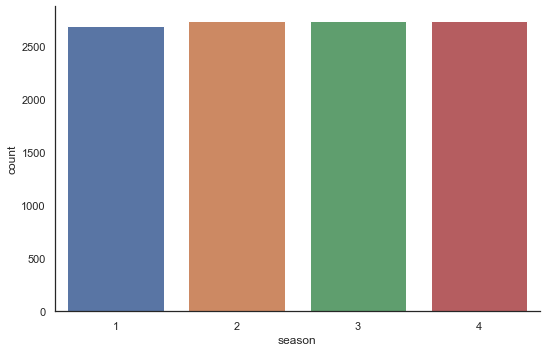

In [8]:
sns.factorplot(x='season',data=train,kind='count',size=5,aspect=1.5)

**휴일별대여량**
- 대부분의 데이터는 근무일의 데이터를 기반으로 하고있음

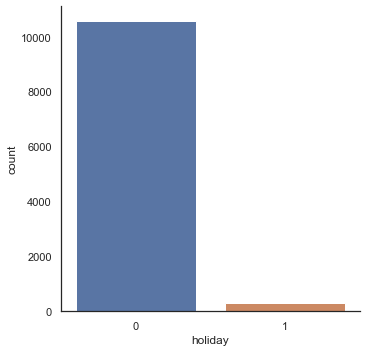

In [9]:
sns.factorplot(x='holiday',data=train,kind='count',size=5,aspect=1)

**날씨별 대여량 확인**

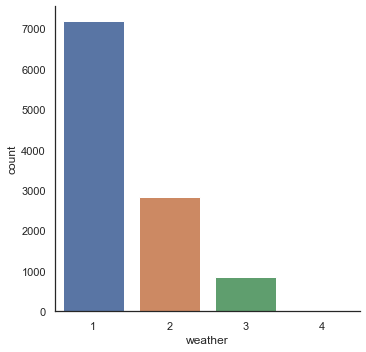

In [10]:
sns.factorplot(x='weather',data=train,kind='count',size=5,aspect=1)  
# 1-> 봄
# 2-> 여름
# 3-> 가을
# 4-> 겨울

**기타 데이터의 분포확인**

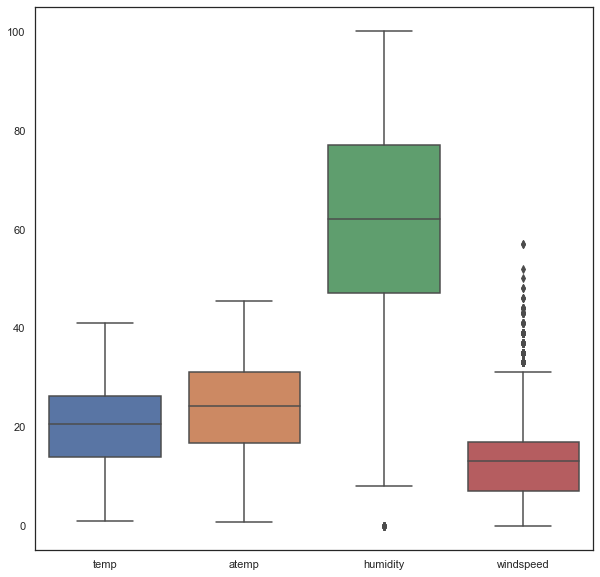

In [11]:
sns.boxplot(data=train[['temp','atemp', 'humidity', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

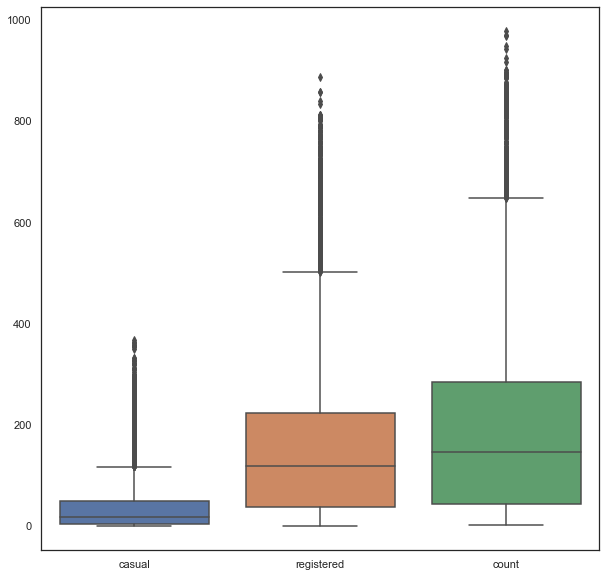

In [12]:
sns.boxplot(data=train[[ 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

**독립변수별 분산**

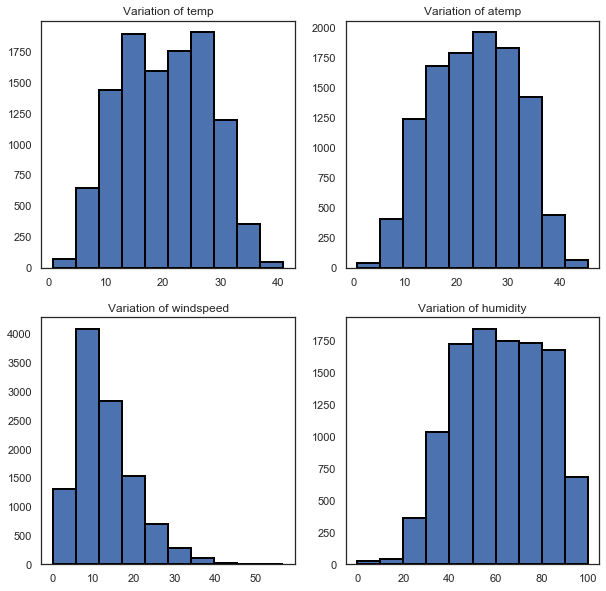

In [13]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train,edgecolor="black",linewidth=2)
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train,edgecolor="black",linewidth=2)
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train,edgecolor="black",linewidth=2)
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train,edgecolor="black",linewidth=2)
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

### HeatMap 
 - temp 변수와 atemp변수는 예상대로 강한 상관관계를 가지고 있음
 - humitity 변수는 대여량과 음의 상관관계를 가지고 있음

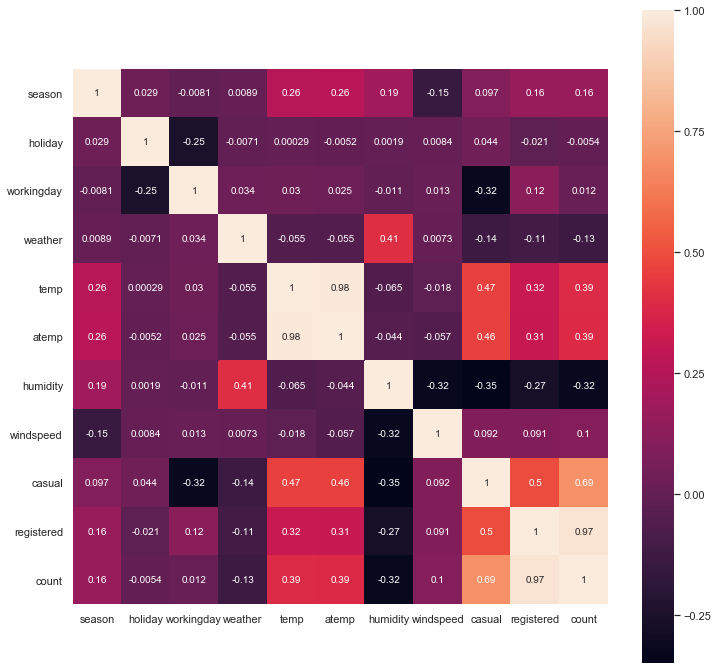

In [14]:
fig=plt.gcf()
fig.set_size_inches(12,12)
sns.heatmap(train.corr(), square=True,annot=True,cbar=True)

## 명목형 데이터 One-Hot 처리

In [15]:
season = pd.get_dummies(train['season'], prefix='season')
train=pd.concat([train,season],axis=1)
season = pd.get_dummies(test['season'], prefix='season')
test=pd.concat([test,season],axis=1)

In [16]:
weather = pd.get_dummies(train['weather'], prefix='weather')
train=pd.concat([train,weather],axis=1)
weather = pd.get_dummies(test['weather'], prefix='weather')
test=pd.concat([test,weather],axis=1)

In [17]:
train.drop(['season','weather'],inplace=True,axis=1)
test.drop(['season','weather'],inplace=True,axis=1)

## 시간 데이터 세분화

In [18]:
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})

In [19]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})

In [20]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

## HeatMap

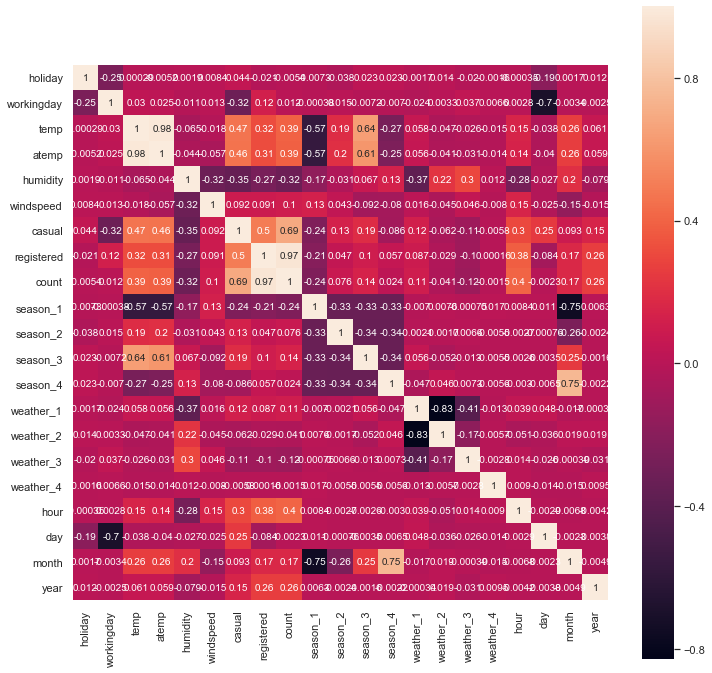

In [21]:
fig=plt.gcf()
fig.set_size_inches(12,12)
sns.heatmap(train.corr(), square=True,annot=True,cbar=True)

In [22]:
train.drop(['casual','registered'],axis=1,inplace=True)

In [23]:
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


**시간데이터별 자전거대여량**
 - 시간별로는 주간에 대여량이 많음
 - 월 별로는 하절기에 대여량이 많음
 - 년도 별로는 2011년 보다 2012년에 대여량이 많음
 - 요일별로는 균일한 대여량을 보이고 있음

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


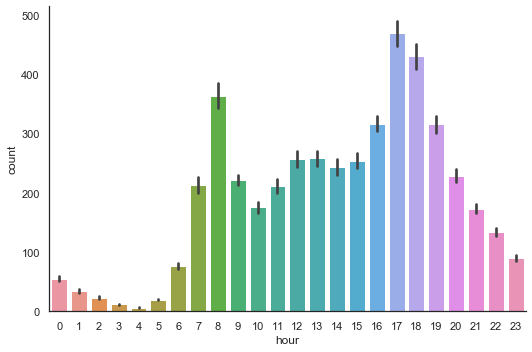

In [24]:
sns.factorplot(x="hour",y="count",data=train,kind='bar',size=5,aspect=1.5)

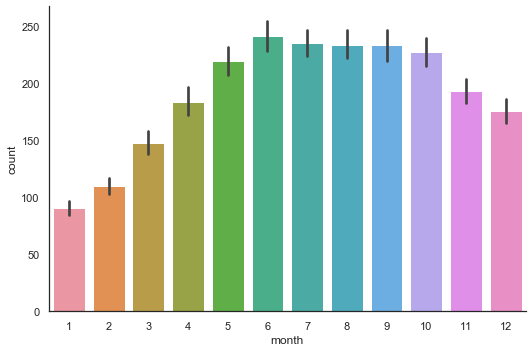

In [25]:
sns.factorplot(x="month",y="count",data=train,kind='bar',size=5,aspect=1.5)

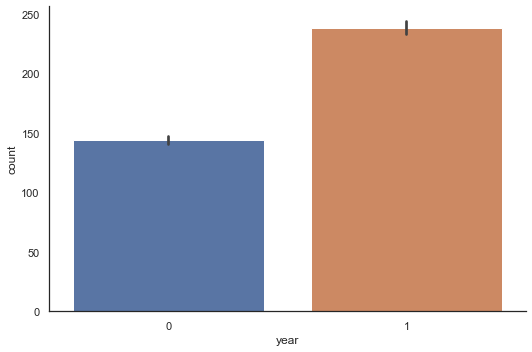

In [26]:
sns.factorplot(x="year",y="count",data=train,kind='bar',size=5,aspect=1.5)

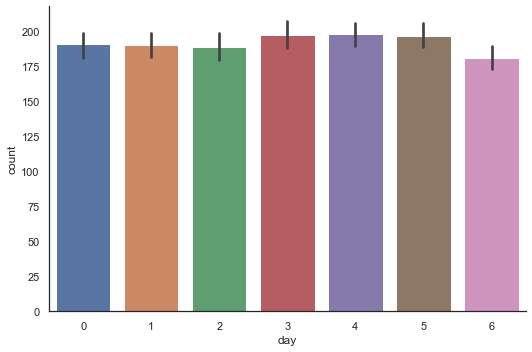

In [27]:
sns.factorplot(x="day",y="count",data=train,kind='bar',size=5,aspect=1.5)

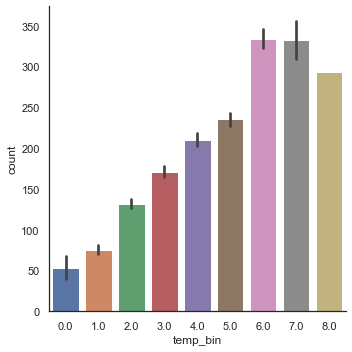

In [28]:
new_df=train.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

## Modeling
 - R2 score 기준으로 randomforest regressor와 BaggingRegressor가 가장 성능이 좋음

In [29]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('count',axis=1),train['count'],test_size=0.25,random_state=42)

In [30]:
models=[LinearRegression(),Ridge(),Lasso(),RidgeCV(),RandomForestRegressor(),BaggingRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),KNeighborsRegressor()]
model_names=['LinearRegression','Ridge','Lasso','RidgeCV','RandomForestRegressor','BaggingRegressor','GradientBoostingRegressor','AdaBoostRegressor','KNeighborsRegressor']
r2_=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    r2_.append(r2_score(test_pred,y_test))
d={'Model Name':model_names,'R2_score':r2_}   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
d

{'Model Name': ['LinearRegression',
  'Ridge',
  'Lasso',
  'RidgeCV',
  'RandomForestRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor',
  'AdaBoostRegressor',
  'KNeighborsRegressor'],
 'R2_score': [-0.5299895449212544,
  -0.5303523755272195,
  -0.5739139883029121,
  -0.5328174507184282,
  0.942893526181168,
  0.9462715301511304,
  0.8141191453362169,
  0.45236566960986446,
  0.3327612803989073]}

In [32]:
r2_df = pd.DataFrame(d)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


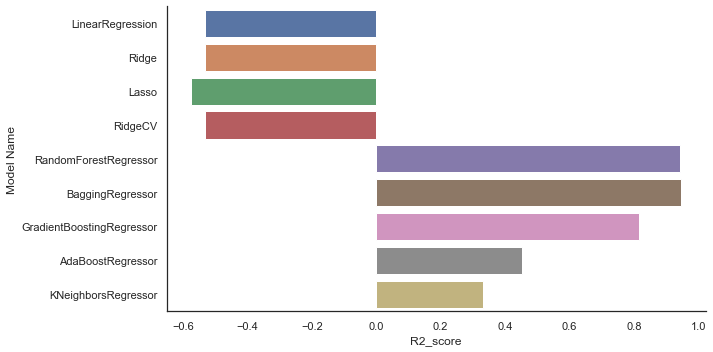

In [33]:
sns.factorplot(y='Model Name',x='R2_score',data=r2_df,kind='bar',size=5,aspect=2)

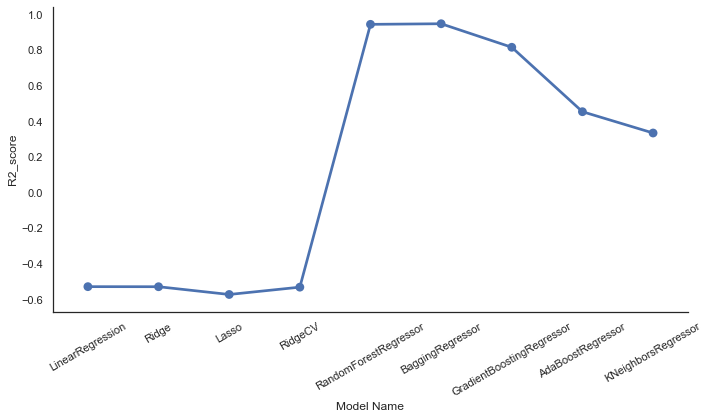

In [34]:
g = sns.factorplot(y='R2_score',x='Model Name',data=r2_df,kind='point',size=5,aspect=2)
g.set_xticklabels(rotation=30)

In [35]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test, pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9474355495474962


## Test Data 예측

In [36]:
prediction = rf.predict(test)

In [37]:
prediction

array([ 10.5,   4.5,   4.1, ..., 169.8, 111.5,  65.4])

In [38]:
submission = pd.read_csv('sampleSubmission.csv')

In [39]:
submission['count'] = prediction

In [40]:
submission.to_csv('submission.csv',index=False)